<a href="https://colab.research.google.com/github/MariaGabrielp/HR_Analitica/blob/main/B.%20Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings ## funciones para imprimir y registrar advertencias.
warnings.filterwarnings("ignore") #suprimir cualquier advertencia que pueda ser generada por el código.

In [2]:
###Librerias
import pandas as pd ### Manejo de datos
import sqlite3 as sql #### Bases de datos y archivos sql
#import a_funciones as funciones  ### Archivo de funciones propias
#import sys ## saber ruta de la que carga paquetes
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Comprensión y lectura de los datos

En el caso planteado se nos fue facilitada el aceso a 4 bases de datos correspondidentes a los datos del problema y un diccionario que nos permite comprender un poco la estructura de estos.

Las bases estan disponibles para los años 2015 y 2016, para trabajar con mayor presición vamos a elaborar un preprocesamiento por cada año.

**Lectura de datos del 2015**

In [9]:
df_survey = pd.read_csv("https://raw.githubusercontent.com/MariaGabrielp/HR_Analitica/main/Datos/employee_survey_data.csv", sep=";")
df_general = pd.read_csv("https://raw.githubusercontent.com/MariaGabrielp/HR_Analitica/main/Datos/general_data.csv", sep=";")
df_manager = pd.read_csv("https://raw.githubusercontent.com/MariaGabrielp/HR_Analitica/main/Datos/manager_survey.csv",  sep=";")
df_retir = pd.read_csv("https://raw.githubusercontent.com/MariaGabrielp/HR_Analitica/main/Datos/retirement_info.csv", sep=";")

##Visualización de datos

**Vista preliminar de las bases de datos, nulos, categorias y outliners**

In [10]:
df_survey.head() #Encuesta realizada a los empleados sobre satisfacción laboral a final del 2015

,Unnamed: 0,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DateSurvey
0,0,1,3.0,4.0,2.0,31/12/2015
1,1,2,3.0,2.0,4.0,31/12/2015
2,2,3,2.0,2.0,1.0,31/12/2015
3,3,4,4.0,4.0,3.0,31/12/2015
4,4,5,4.0,1.0,3.0,31/12/2015


In [11]:
df_general.head() #Información general de los empleados de 2015

,Unnamed: 0,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate
0,0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,11,8,0,1.0,6,1,0,0,31/12/2015
1,1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,23,8,1,6.0,3,5,1,4,31/12/2015
2,2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,Y,15,8,3,5.0,2,5,0,3,31/12/2015
3,3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,Y,11,8,3,13.0,5,8,7,5,31/12/2015
4,4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,Y,12,8,2,9.0,2,6,0,4,31/12/2015


In [12]:
df_manager.head() #Encuesta de desempeño de los empleados realizada por parte de los jefes

,Unnamed: 0,EmployeeID,JobInvolvement,PerformanceRating,SurveyDate
0,0,1,3,3,31/12/2015
1,1,2,2,4,31/12/2015
2,2,3,3,3,31/12/2015
3,3,4,2,3,31/12/2015
4,4,5,3,3,31/12/2015


In [13]:
df_retir.head() #Información de retiro de los empleados que dejaron la empresa

,Unnamed: 0.1,Unnamed: 0,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,0,0,2,Yes,15/10/2016,Resignation,Others
1,1,1,7,Yes,20/07/2016,Resignation,Stress
2,2,2,14,Yes,8/11/2016,Resignation,Others
3,3,3,29,Yes,15/10/2016,Resignation,Others
4,4,4,31,Yes,8/02/2016,Resignation,Salary


In [14]:
#Se evidencian columnas que estan siendo repetidas con información poco relevante
#por eso se proceden a eliminar las columnas con datos repetidos

# Borrar la columna "columna2"
df_survey.drop(["Unnamed: 0", "DateSurvey"], axis=1, inplace=True)
df_general.drop(["Unnamed: 0", "InfoDate"], axis=1, inplace=True)
df_manager.drop(["Unnamed: 0", "SurveyDate"], axis=1, inplace=True)
df_retir.drop(["Unnamed: 0","Unnamed: 0.1"], axis=1, inplace=True)

In [ ]:
# Para cambiar el tipo se dato puede utilizar la función astype de pandas
#dfdata['DateSurvey'] = pd.to_datetime(dfdata['DateSurvey'])
#dfdata['retirementDate'] = pd.to_datetime(dfdata['retirementDate'])
#dfdata['SurveyDate'] = pd.to_datetime(dfdata['SurveyDate'])
#dfdata['InfoDate'] = pd.to_datetime(dfdata['InfoDate'])

In [15]:
# Para cambiar el tipo se dato puede utilizar la función astype de pandas
#df_survey['DateSurvey'] = pd.to_datetime(df_survey['DateSurvey'])
df_retir['retirementDate'] = pd.to_datetime(df_retir['retirementDate'])
#df_manager['SurveyDate'] = pd.to_datetime(df_manager['SurveyDate'])
#df_general['InfoDate'] = pd.to_datetime(df_general['InfoDate'])

In [16]:
###### Verificar lectura correcta de los datos

df_survey.sort_values(by=['EmployeeID'],ascending=1).head(5)


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [18]:
df_general.sort_values(by=["EmployeeID"],ascending=1).head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [19]:
df_manager.sort_values(by=["EmployeeID"],ascending=1).head(5)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [20]:
df_retir.sort_values(by=["EmployeeID"],ascending=1).head(5)

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,2016-10-15,Resignation,Others
1,7,Yes,2016-07-20,Resignation,Stress
2,14,Yes,2016-08-11,Resignation,Others
3,29,Yes,2016-10-15,Resignation,Others
4,31,Yes,2016-08-02,Resignation,Salary


In [22]:
# Obtener información sobre los DataFrames
df_survey.info(verbose=True)
#----------------------------------------------
df_general.info()
df_manager.info()
df_retir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           441

In [24]:
# Verificar entradas faltantes
print(df_survey.isnull().sum())
print(df_general.isnull().sum())
print(df_manager.isnull().sum())
print(df_retir.isnull().sum())

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64
EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64
EmployeeID            0
Attrition             0
retirementDate        0
retirement

#Preprocesamiento

In [21]:
#Procedemos a unir las tablas para que sea mas fácil trabajarlas
dftotal=df_survey.merge(df_general, on="EmployeeID", how="inner")
dftotal2=dftotal.merge(df_manager, on="EmployeeID", how="inner")
dftotal3=dftotal2.merge(df_retir, on="EmployeeID", how="left")
# Tenemos finalmente un solo dataframe combinado con todas las tablas a partir de la columna ID
dfdata=dftotal3.copy()
dfdata.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason
0,1,3.0,4.0,2.0,51,Travel_Rarely,Sales,6,2,Life Sciences,...,6,1,0,0,3,3,NaN,NaT,NaN,NaN
1,2,3.0,2.0,4.0,31,Travel_Frequently,Research & Development,10,1,Life Sciences,...,3,5,1,4,2,4,Yes,2016-10-15,Resignation,Others
2,3,2.0,2.0,1.0,32,Travel_Frequently,Research & Development,17,4,Other,...,2,5,0,3,3,3,NaN,NaT,NaN,NaN
3,4,4.0,4.0,3.0,38,Non-Travel,Research & Development,2,5,Life Sciences,...,5,8,7,5,2,3,NaN,NaT,NaN,NaN
4,5,4.0,1.0,3.0,32,Travel_Rarely,Research & Development,10,1,Medical,...,2,6,0,4,3,3,NaN,NaT,NaN,NaN


In [ ]:
# Obtener la cantidad de valores únicos en cada columna
nunique_values = dfdata.nunique()

# Seleccionar las columnas con un solo valor
single_value_columns = nunique_values[nunique_values == 1].index

print("Variables con un único valor: ", single_value_columns)

Variables con un único valor:  Index(['EmployeeCount', 'Over18', 'StandardHours', 'Attrition'], dtype='object')


In [ ]:
### las variables 'EmployeeCount', 'Over18', 'StandardHours'... cuentan con un unico valor, lo que no aportaria
## a nuestro modelo por ende seran eliminadas, sin embargo no se eliminara "atrition" debido a que es nuestra variable
## objetivo debido a que hace referencia a las personas que abandonaron la empresa

### Eliminacion de variables
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
dfdata = dfdata.drop(columns=columns_to_drop)
### otras variables que no aportan, ni me dicen nada
columns_to_drop = ['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_y']
dfdata = dfdata.drop(columns=columns_to_drop)

In [ ]:
## Verificación de valores nulos
print(dfdata.isnull().sum())

EmployeeID                     0
EnvironmentSatisfaction      200
JobSatisfaction              160
WorkLifeBalance              304
DateSurvey                     0
Age                            0
BusinessTravel                 0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
Gender                         0
JobLevel                       0
JobRole                        0
MaritalStatus                  0
MonthlyIncome                  0
NumCompaniesWorked           152
PercentSalaryHike              0
StockOptionLevel               0
TotalWorkingYears             72
TrainingTimesLastYear          0
YearsAtCompany                 0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
InfoDate                       0
JobInvolvement                 0
PerformanceRating              0
SurveyDate                     0
Attrition                  29592
retirementDate             29592
retirement

In [ ]:
##tratamiento de nulos
print(dfdata['EnvironmentSatisfaction'].value_counts())
print(dfdata['EnvironmentSatisfaction'].mean())
print(dfdata['EnvironmentSatisfaction'].median())
print('-------------------------------')

print(dfdata['JobSatisfaction'].value_counts())
print(dfdata['JobSatisfaction'].mean())
print(dfdata['JobSatisfaction'].median())
print('-------------------------------')

print(dfdata['WorkLifeBalance'].value_counts())
print(dfdata['WorkLifeBalance'].mean())
print(dfdata['WorkLifeBalance'].median())
print('-------------------------------')

print(dfdata['NumCompaniesWorked'].value_counts())
print(dfdata['NumCompaniesWorked'].mean())
print(dfdata['NumCompaniesWorked'].median())
print('-------------------------------')

3.0    10800
4.0    10672
2.0     6848
1.0     6760
Name: EnvironmentSatisfaction, dtype: int64
2.7236031927023947
3.0
-------------------------------
4.0    10936
3.0    10584
1.0     6880
2.0     6720
Name: JobSatisfaction, dtype: int64
2.728246013667426
3.0
-------------------------------
3.0    21280
2.0     8152
4.0     3632
1.0     1912
Name: WorkLifeBalance, dtype: int64
2.7614364135407135
3.0
-------------------------------
1.0    12464
0.0     4688
3.0     3792
2.0     3504
4.0     3320
7.0     1776
6.0     1664
5.0     1496
9.0     1248
8.0     1176
Name: NumCompaniesWorked, dtype: int64
2.6948303347756775
2.0
-------------------------------


In [ ]:
##al ser el valor que mas aparece, la media sea 3 y la moda de un valor muy cercano a 3; los nulos de esta variable seran reemplazado por 3
dfdata['EnvironmentSatisfaction'] = dfdata['EnvironmentSatisfaction'].fillna(3.0)
dfdata['JobSatisfaction'] = dfdata['JobSatisfaction'].fillna(3.0)
dfdata['WorkLifeBalance'] = dfdata['WorkLifeBalance'].fillna(3.0)
##al ser una variable que cuenta con muy pocos nulos (numero de compañias en las que ha trabajo) los nulos se reemplazaran con el valor que mas aparece en la columna(1.0)
dfdata['NumCompaniesWorked'] = dfdata['NumCompaniesWorked'].fillna(1.0)

In [ ]:
###Se puede observar que total working years tiene datos faltantes, sin embargo son 72; una cantidad que en comparacion con el total de la variable es muy poca... por lo que se procede a la ampuacion de estos datos debido a que no afectaria a la variable
dfdata = dfdata.dropna(subset=['TotalWorkingYears'])

In [ ]:
print(dfdata.isnull().sum())

EmployeeID                     0
EnvironmentSatisfaction        0
JobSatisfaction                0
WorkLifeBalance                0
DateSurvey                     0
Age                            0
BusinessTravel                 0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
Gender                         0
JobLevel                       0
JobRole                        0
MaritalStatus                  0
MonthlyIncome                  0
NumCompaniesWorked             0
PercentSalaryHike              0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
YearsAtCompany                 0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
InfoDate                       0
JobInvolvement                 0
PerformanceRating              0
SurveyDate                     0
Attrition                  29536
retirementDate             29536
retirement

In [ ]:
##### por ultimo se revisa que las variables tengan su tipo de dato sea el correcto
print(dfdata.head(4))
print(dfdata.dtypes)

   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0           1                      3.0              4.0              2.0   
1           1                      3.0              4.0              2.0   
2           1                      3.0              4.0              2.0   
3           1                      3.0              4.0              2.0   

  DateSurvey  Age BusinessTravel Department  DistanceFromHome  Education  ...  \
0 2015-12-31   51  Travel_Rarely      Sales                 6          2  ...   
1 2015-12-31   51  Travel_Rarely      Sales                 6          2  ...   
2 2015-12-31   51  Travel_Rarely      Sales                 6          2  ...   
3 2015-12-31   51  Travel_Rarely      Sales                 6          2  ...   

  YearsSinceLastPromotion YearsWithCurrManager   InfoDate JobInvolvement  \
0                       0                    0 2015-12-31              3   
1                       0                    0 2015-12-31    

In [ ]:
#convertimos la variable objetivo a binaria, siendo 0 = empleados actuales, y 1 = empleados que ya no estan presentes
dfdata['Attrition'] = dfdata['Attrition'].apply(lambda x: 0 if x == 'Yes' else 1)

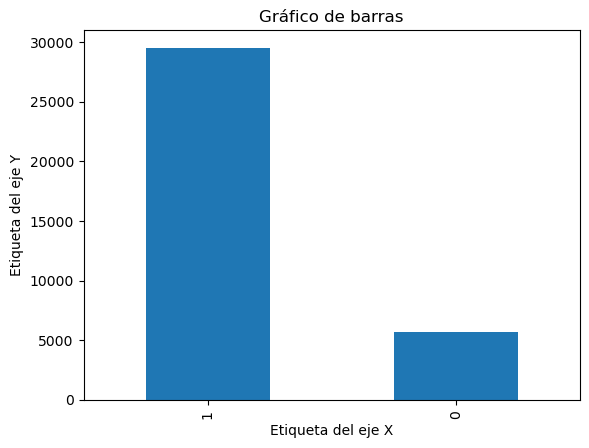

In [ ]:
dfdata['Attrition'].value_counts().plot(kind='bar')

# Agregar etiquetas y título
plt.xlabel('Etiqueta del eje X')
plt.ylabel('Etiqueta del eje Y')
plt.title('Gráfico de barras')

# Mostrar el gráfico
plt.show()

In [ ]:
df1 = dfdata[dfdata['retirementType'] != 'Fired']
df1.head(10)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DateSurvey,Age,BusinessTravel,Department,DistanceFromHome,Education,...,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,JobInvolvement,PerformanceRating,SurveyDate,Attrition,retirementDate,retirementType,resignationReason
0,1,3.0,4.0,2.0,2015-12-31,51,Travel_Rarely,Sales,6,2,...,0,0,2015-12-31,3,3,2015-12-31,1,NaT,NaN,NaN
1,1,3.0,4.0,2.0,2015-12-31,51,Travel_Rarely,Sales,6,2,...,0,0,2015-12-31,3,3,2016-12-31,1,NaT,NaN,NaN
2,1,3.0,4.0,2.0,2015-12-31,51,Travel_Rarely,Sales,6,2,...,0,0,2016-12-31,3,3,2015-12-31,1,NaT,NaN,NaN
3,1,3.0,4.0,2.0,2015-12-31,51,Travel_Rarely,Sales,6,2,...,0,0,2016-12-31,3,3,2016-12-31,1,NaT,NaN,NaN
4,1,3.0,4.0,2.0,2016-12-31,51,Travel_Rarely,Sales,6,2,...,0,0,2015-12-31,3,3,2015-12-31,1,NaT,NaN,NaN
5,1,3.0,4.0,2.0,2016-12-31,51,Travel_Rarely,Sales,6,2,...,0,0,2015-12-31,3,3,2016-12-31,1,NaT,NaN,NaN
6,1,3.0,4.0,2.0,2016-12-31,51,Travel_Rarely,Sales,6,2,...,0,0,2016-12-31,3,3,2015-12-31,1,NaT,NaN,NaN
7,1,3.0,4.0,2.0,2016-12-31,51,Travel_Rarely,Sales,6,2,...,0,0,2016-12-31,3,3,2016-12-31,1,NaT,NaN,NaN
8,2,3.0,2.0,4.0,2015-12-31,31,Travel_Frequently,Research & Development,10,1,...,1,4,2015-12-31,2,4,2015-12-31,0,2016-10-15,Resignation,Others
9,2,3.0,2.0,4.0,2015-12-31,31,Travel_Frequently,Research & Development,10,1,...,1,4,2015-12-31,2,4,2016-12-31,0,2016-10-15,Resignation,Others
